## Instructions
Today's Tasks:
1. Find a dataset you want to analyze on Kaggle or another site (make sure the dataset is in one file, csv format!)
2. Create a GitHub repository for your final project and clone it in your local computer
3.Create a README.md for the repository that briefly explains why you were interested in this data and a list of at least 10 questions you want to answer using the dataset with, at least, 1 visualization per question.
4. Create a Jupyter notebook file for your data analysis in your local copy of the repository.
5. Add the dataset, Jupyter notebook file, and READMEmd to your repository, commit the changes, and push them to origin.

## Preliminary Analysis
1. Describe the data set
2. List all columns and datatype of each column
3. List all null columns

#### Import the dataset

In [2]:
# install required libraries
!pip install pandas matplotlib seaborn 

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/1b/ef/63136f5ab2dab6f119ded7c5d31b6294e825059b57d4e5b03042fd557b46/pandas-2.1.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached pandas-2.1.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata (18 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/a9/0d/53afb186adafc7326d093b8333e8a79974c495095771659f4304626c4bc7/matplotlib-3.8.2-cp311-cp311-macosx_10_12_x86_64.whl.metadata
  Using cached matplotlib-3.8.2-cp311-cp311-macosx_10_12_x86_64.whl.metadata (5.8 kB)
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
  Obtaining dependency information for numpy<2,>=1.23.2 from https://files.pythonhosted.org/packages/51/3b/2ba379bf754f13041e3d8b9

In [7]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import the dataset
animal_data = pd.read_csv("data/data.csv")

# view first 5 rows of dataset
animal_data.head()

,Animal,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Dangerous
0,dog,fever,diarrhoea,vomit,weight loss,dehydration,yes
1,dog,fever,diarrhoea,cough,tiredness,pain,yes
2,dog,fever,diarrhoea,cough,vomit,anorexia,yes
3,dog,fever,breathing difficulty,cough,lethargy,sneering,yes
4,dog,fever,diarrhoea,cough,lethargy,blue eye,yes


#### Preliminary Analysis on Dataset

In [8]:
# describe the dataset
animal_data.describe()

,Animal,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Dangerous
count,869,869,869,869,869,869,869
unique,34,208,209,206,196,182,2
top,buffalo,fever,diarrhoea,cough,weight loss,pain,yes
freq,128,271,125,97,117,167,849


From the above, it can be gleaned that 
- There are 869 observations in the dataset.
- There are 34 unique animals in the dataset with buffalo being the most common animal in the dataset.

## Exploratory Analysis

### 1. What kinds of animals are present in the dataset and in what quantities?
The following is a histogram displaying each of the distinct animals in the dataset and the quantities in which they occur.

<Axes: xlabel='Animal', ylabel='Count'>

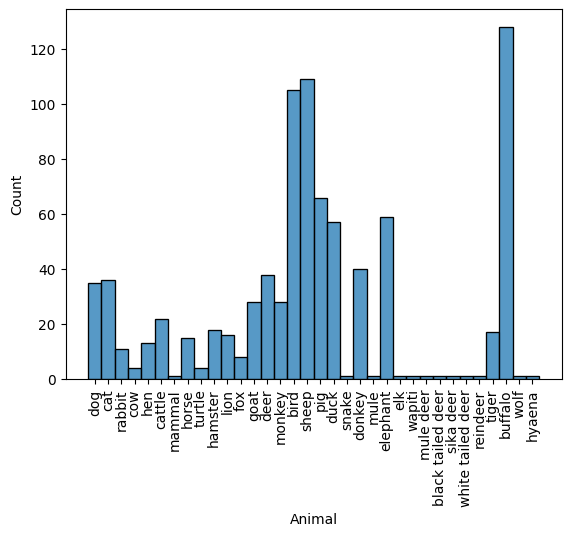

In [13]:
# rotate the x-axis labels so they can fit in the same space
plt.xticks(rotation=90)

# plot a histogram of the animals and their frequencies
sns.histplot(animal_data, x="Animal")

From the results above, some of the animals present are dogs, cats, rabbits, cows, hen, cattle, etc. and the quantities in which they occur in the dataset ranges from 1 to over 120.

### 2. What is the proportion of domestic animals to wild animals in the dataset?
I have arbitrarily classified the following animals in the dataset as domestic:
 - dog
 - cat
 - rabbit
 - cow
 - hen
 - cattle
 - horse
 - hamster
 - goat
 - sheep
 - pig
 - duck
 - donkey
 - mule

A good way to visualize this proportion would be with a pie chart, and the following pie chart displays the proportion of domestic animals to wild animals in the dataset:

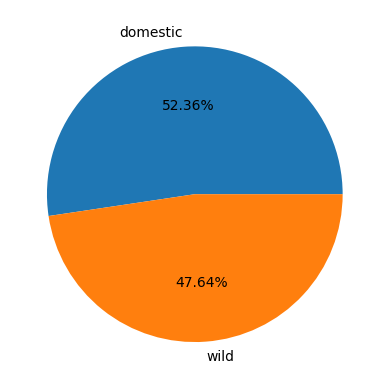

In [37]:
# define function for classifying animals
def is_wild(animal_index: int) -> str:
    """Return True if the animal at index `animal_index` is wild. Otherwise, return False."""
    domestic_animals = ["dog", "cat", "rabbit", "cow", "hen", "cattle", "horse", "hamster", "goat", "sheep", "pig", "duck", "donkey", "mule"]
    return "wild" if animal_data.loc[animal_index, "Animal"] not in domestic_animals else "domestic"

# group the data using the is_wild function
groups = animal_data.groupby(by=is_wild)

# visualize the groups on a pie chart
labels = []
values = []

for group in groups:
    labels.append(group[0])  # add group name to list of labels
    values.append(len(group[1]))  # add number of animals in group to list of values

plt.pie(values, labels=labels, autopct="%0.2f%%")
plt.show()

Hence, 52.36% of the animals in the dataset are domestic animals whereas 47.64% of the animals in the dataset are wild animals.
This is not as big of a difference as I had anticipated but still confirms my initial hypothesis.

#### 3. What are the different symptoms and in what quantities do they occur?
A barchart will be a good way to visualize the distinct symptoms in the dataset.